In [14]:
# generic imports
import sys
import os

# numerics imports
import numpy as np
import matplotlib.pyplot as plt

# visualization imports
import matplotlib as mpl
from matplotlib import cm

In [15]:
# transition manifold imports
sys.path.insert(0,  '../..')
import tram.system as system
import tram.kernels as krnls
import tram.transition_manifold as tm
import driftdiffusion

In [16]:
# setting up the system
domain = np.array([[0, 0], [1, 1]])
mydriftdiffusion = driftdiffusion.DriftDiffusion()
system = system.DriftDiffusionSystem(mydriftdiffusion, domain)

In [4]:
# generate dynamical data
nTestpoints = 32
xtest = system.generateTestpoints(nTestpoints, 'grid')

t0 = 0
t = 5
dt = 0.01
M = 100

X = system.generatePointclouds(t, dt, xtest, t0, M)

Generating poinclouds...


100%|██████████| 1024/1024 [01:40<00:00, 10.21it/s]


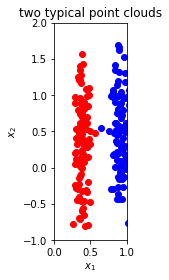

In [8]:
# visualize pointclouds
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(X[300, :, 0], X[300, :, 1], 'ro')
plt.plot(X[700, :, 0], X[700, :, 1], 'bo')
plt.gca().set_aspect('equal', adjustable='box')

ax.set_xlim(0,1)
ax.set_ylim(-1,2)

ax.set_title(r'two typical point clouds')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [17]:
# compute reaction coordinate using full kernel embeddings
kernel = krnls.GaussianKernel(1)
epsi_diffmap = 1
kerTM = tm.KernelBurstTransitionManifold(kernel, 1)
kerTM.fit(X)

Computing symmetric kernel evaluations...


100%|██████████| 1024/1024 [00:00<00:00, 7714.58it/s]

Computing asymmetric kernel evaluations...



100%|██████████| 1024/1024 [00:43<00:00, 11.75it/s]


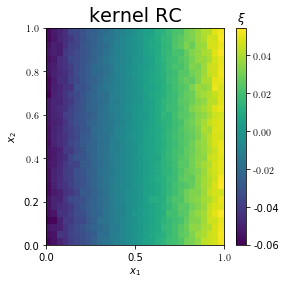

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# visualize RC
pcol = ax.pcolormesh( xtest[:,0].reshape(nTestpoints, -1),
             xtest[:,1].reshape(nTestpoints, -1),
             np.real(kerTM.rc[1][:,1].reshape(nTestpoints,-1)),
             shading='flat',
             )
clb = fig.colorbar(pcol)
clb.ax.set_title(r'$\xi$')

plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 16}
plt.rc('font', **font)
fig.set_size_inches(4,4)
ax.set_title(r'kernel RC')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [19]:
# compute reaction coordinate using random Fourier features
fourierTM = tm.LinearRandomFeatureManifold()
fourierTM.fit(X)
Y=fourierTM.predict(xtest)

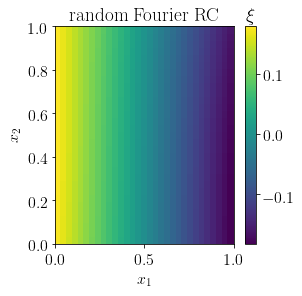

In [20]:
# visualize the RC
fig = plt.figure()
ax = fig.add_subplot(111)

# visualize RC
pcol = ax.pcolormesh( xtest[:,0].reshape(nTestpoints, -1),
             xtest[:,1].reshape(nTestpoints, -1),
             np.real(Y.reshape(nTestpoints,-1)),
             shading='flat',
             )
clb = fig.colorbar(pcol)
clb.ax.set_title(r'$\xi$')

plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 16}
plt.rc('font', **font)
fig.set_size_inches(4,4)
ax.set_title(r'random Fourier RC')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()